In [3]:
# to cut the cubes around the emission lines 
import galpak
from galpak import DefaultModel, ModelSersic
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import ascii 
from astropy.table import Table, Column
import os.path
import os
from spectral_cube import SpectralCube
from astropy import units as u

lines = [3726.032,3728.815, 4958.911, 5006.843 ]# [OII] and [OIII] doublets u.AA
#Reading catalog
hdul = fits.open('/media/marcelagonzalez/Toto/sci/MOKA/MOKA-CANDELS-GOODS.fits')
cat= Table.read(hdul[1])
z = cat['z']
ID= cat['ID']
inst = cat['inst']

path_galpak= '/media/marcelagonzalez/Toto/Galpak'

for m in range(len(z)):
    if inst[m]=='MUSE':
        OII_1= np.float64(lines[0]*(z[m]+1))
        OII_2= np.float64(lines[1]*(z[m]+1))
        OIII_1= np.float64(lines[2]*(z[m]+1))
        OIII_2= np.float64(lines[3]*(z[m]+1))
        file_data= '/home/marcelagonzalez/MUSE/cut/MUSE-objects/MUSE-{0}-STAT.fits'.format(ID[m])
        hdu1 = fits.open(file_data)
        cube_DATA= SpectralCube.read(hdu1,0)
        
        if cat['line'][m]=="O3":
            cube_OIII= cube_DATA.spectral_slab(np.float64(OIII_1-50.0)*u.AA, np.float64(OIII_2+50.0)*u.AA)
            cube_OIII.write('{0}/cubes-input/cube_OIII-{1}-STAT.fits'.format(path_galpak, ID[m]), overwrite=True)
            
        elif cat['line'][m]=="O2":
            cube_OII= cube_DATA.spectral_slab(np.float64(OIII_1-50.0)*u.AA, np.float64(OIII_2+50.0)*u.AA)
            cube_OII.write('{0}/cubes-input/cube_OII-{1}-STAT.fits'.format(path_galpak, ID[m]), overwrite=True)

        elif cat['line'][m]=="both":
            cube_OIII= cube_DATA.spectral_slab(np.float64(OII_1-50.0)*u.AA, np.float64(OII_2+50.0)*u.AA)
            cube_OIII.write('{0}/cubes-input/cube_OII-{1}-STAT.fits'.format(path_galpak, ID[m]), overwrite=True)
        
        elif cat['line'][m]=="three":
            cube_OII= cube_DATA.spectral_slab(np.float64(OIII_1-50.0)*u.AA, np.float64(OIII_2+50.0)*u.AA)
            cube_OII.write('{0}/cubes-input/cube_OIII-{1}-STAT.fits'.format(path_galpak, ID[m]), overwrite=True)
        
#file_data= '/home/marcelagonzalez/MUSE/cut/MUSE-objects/MUSE-{0}-DATA.fits'.format(ID)
#hdu1 = fits.open(file_data)
#cube_DATA= SpectralCube.read(hdu1,0)
#cube_OIII= cube_DATA.spectral_slab(np.float64(OIII_1-50.0)*u.AA, np.float64(OIII_2+50.0)*u.AA)
#cube_OIII.write('cube_OIII-7584.fits') 


#for m in range(len(z)):
   # if inst[m]=='MUSE':
      #  file_exists=os.path.exists('{0}/MUSE-{1}'.format(path_galpak, ID[m]))
       # if file_exists==False: 
          #  file_data= '/home/marcelagonzalez/MUSE/cut/MUSE-objects/MUSE-{0}-DATA.fits'.format(ID[m])


In [ ]:
#to test with one cube
file_data= '{0}/cube_OIII-7584.fits'.format(path_galpak)

my_instrument = galpak.MUSE(psf_fwhm=1.0, lsf_fwhm=2.51)
my_model = galpak.DefaultModel(rotation_curve='arctan')

gk = galpak.run(file_data, instrument=my_instrument, max_iterations=500, model=my_model)
os.makedirs('{0}/MUSE-{1}'.format(path_galpak, ID), exist_ok=True)
gk.save('{0}/MUSE-{1}/{1}_galpak'.format(path_galpak, ID))

INFO:GalPaK: PyFFTW (optional) not installed, performances will be degraded
INFO:GalPaK:corner (optional) not installed, corner plots will be disabled
INFO:GalPaK: Running galpak 1.34.0
INFO:GalPaK:Reading cube from /media/marcelagonzalez/Toto/Galpak/cubes-input/cube_OII-18844.fits
INFO:GalPak: HyperCube:Opening /media/marcelagonzalez/Toto/Galpak/cubes-input/cube_OII-18844.fits.
INFO:GalPaK:Using user-provided variance input
INFO:GalPaK:Read provided variance cube   /media/marcelagonzalez/Toto/Galpak/cubes-input/cube_OII-18844-STAT.fits into HyperCube.
INFO:GalPaK:Replacing 0s in the variance cube by 1e12
INFO:GalPaK:Setting up with the following setup :
[INSTRUMENT] :
  type = MUSE
  pixscale = 0.2000000000000016 "

[PSF] :
  type = Gaussian
  fwhm         = 1.0 "
  pa           = 0.0 °
  ba           = 1.0
[LSF] :
  type = Gaussian
  fwhm = 2.51  Angstrom 

cube_xy_step   = 0.2000000000000016 "
cube_z_step    = 1.2499999999999998 Angstrom

cube z_step_kms = 43.341765225445506 km/s  a

    1 MIN=    1 50% χ²=0.425474>0.425474 x=18.00 y=18.00 z=73.499038 flux=3.24e+04 rhalf=3.00 incl=29.9 PA= 69.0 rv=1.00 Vmax= 99.99 Vdisp=5.00 lnlog=-36136.5735 
    2 MIN=    2 67% χ²=0.425455>0.425455 x=18.00 y=18.00 z=73.500185 flux=3.24e+04 rhalf=3.00 incl=29.9 PA= 69.0 rv=1.00 Vmax= 99.98 Vdisp=5.02 lnlog=-36134.9893 
    3 MIN=    3 43% χ²=0.425446>0.425446 x=18.01 y=18.00 z=73.494527 flux=3.24e+04 rhalf=3.00 incl=29.9 PA= 68.9 rv=1.00 Vmax=100.06 Vdisp=5.02 lnlog=-36134.1624 
    4 MIN=    4 50% χ²=0.425402>0.425402 x=17.98 y=18.00 z=73.494080 flux=3.24e+04 rhalf=3.00 incl=29.9 PA= 68.9 rv=1.00 Vmax=100.08 Vdisp=5.04 lnlog=-36130.4182 
    5 MIN=    5 56% χ²=0.425317>0.425317 x=17.98 y=18.00 z=73.494566 flux=3.24e+04 rhalf=3.01 incl=29.9 PA= 68.9 rv=1.00 Vmax=100.12 Vdisp=4.97 lnlog=-36123.2220 
    6 MIN=    6 60% χ²=0.425189>0.425189 x=17.98 y=18.00 z=73.497569 flux=3.24e+04 rhalf=3.01 incl=29.9 PA= 68.6 rv=1.00 Vmax=100.05 Vdisp=5.05 lnlog=-36112.3477 
    7 MIN=    7 58% χ²

/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/model_class.py:469: RuntimeWarning: underflow encountered in square
  bad = (flux_map**2 == 0)
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/model_class.py:489: RuntimeWarning: invalid value encountered in divide
  sigz_map_ale = np.sqrt(bn.nansum(sig_ale_disk ** 2 * flux_cube ** 2, 0) / norm)
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/model_class.py:397: RuntimeWarning: divide by zero encountered in divide
  amplitude =  flux_map / ampsum


   89 MIN=   88 50% χ²=0.358899>0.358895 x=17.84 y=17.97 z=73.111585 flux=9.34e+01 rhalf=1.47 incl=29.4 PA=239.4 rv=0.93 Vmax= 95.45 Vdisp=5.08 lnlog=-30482.2301 
   90 MIN=   90 47% χ²=0.358891>0.358891 x=17.85 y=17.97 z=73.023310 flux=3.38e+02 rhalf=1.85 incl=29.4 PA=241.8 rv=0.92 Vmax= 95.95 Vdisp=4.94 lnlog=-30481.4782 
   91 MIN=   90 47% χ²=0.358894>0.358891 x=17.85 y=17.97 z=73.016319 flux=5.16e+02 rhalf=2.11 incl=29.5 PA=267.8 rv=0.93 Vmax= 96.00 Vdisp=4.96 lnlog=-30481.7459 
   92 MIN=   90 46% χ²=0.358895>0.358891 x=17.85 y=17.97 z=72.126574 flux=1.27e+02 rhalf=1.90 incl=29.5 PA=267.9 rv=0.93 Vmax= 96.41 Vdisp=4.09 lnlog=-30481.8754 
   93 MIN=   93 46% χ²=0.358888>0.358888 x=17.85 y=18.01 z=72.147259 flux=5.30e+02 rhalf=1.84 incl=29.3 PA=278.4 rv=0.93 Vmax= 96.82 Vdisp=4.02 lnlog=-30481.2290 
   94 MIN=   93 46% χ²=0.358895>0.358888 x=17.86 y=18.01 z=72.127338 flux=6.21e+02 rhalf=2.04 incl=29.2 PA=280.3 rv=0.92 Vmax= 96.02 Vdisp=3.77 lnlog=-30481.8667 
   95 MIN=   93 45% χ²

/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/math_utils.py:112: RuntimeWarning: underflow encountered in exp
  energy = np.exp(-beta * (radius / size) ** (1. / index))
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/model_class.py:476: RuntimeWarning: invalid value encountered in sqrt
  sig_map_disk = np.where(Var_map>0, np.sqrt(Var_map), 0)
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/model_class.py:319: RuntimeWarning: underflow encountered in multiply
  flux_map = galaxy.flux * flux_map / flux_map.sum()
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/model_class.py:319: RuntimeWarning: underflow encountered in divide
  flux_map = galaxy.flux * flux_map / flux_map.sum()


  100 MIN=   98 38% χ²=0.358892>0.358885 x=17.86 y=18.04 z=73.181392 flux=5.84e+02 rhalf=0.82 incl=28.9 PA=354.7 rv=0.90 Vmax= 96.60 Vdisp=6.61 lnlog=-30481.5863 


/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/model_class.py:471: RuntimeWarning: invalid value encountered in divide
  vz_map = bn.nansum(vz_cube * flux_cube / flux_map, 0)
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/model_class.py:474: RuntimeWarning: invalid value encountered in divide
  v2_map = bn.nansum(vz_cube ** 2 * flux_cube / flux_map, 0)
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/model_class.py:397: RuntimeWarning: invalid value encountered in divide
  amplitude =  flux_map / ampsum


  101 MIN=   98 35% χ²=0.358894>0.358885 x=17.86 y=18.04 z=72.963266 flux=1.31e+02 rhalf=0.84 incl=28.9 PA=328.7 rv=0.90 Vmax= 96.54 Vdisp=7.08 lnlog=-30481.7506 
  102 MIN=   98 31% χ²=0.358920>0.358885 x=17.87 y=18.04 z=72.947862 flux=9.55e+02 rhalf=0.92 incl=29.3 PA=318.8 rv=0.65 Vmax=100.58 Vdisp=7.10 lnlog=-30483.9517 
  103 MIN=   98 30% χ²=0.358894>0.358885 x=17.86 y=18.03 z=72.936255 flux=7.46e+02 rhalf=0.85 incl=29.2 PA=316.4 rv=0.70 Vmax=100.94 Vdisp=6.68 lnlog=-30481.7798 
  104 MIN=  104 29% χ²=0.358883>0.358883 x=17.87 y=18.03 z=72.964340 flux=3.65e+02 rhalf=1.02 incl=29.2 PA=320.9 rv=1.00 Vmax=101.20 Vdisp=6.66 lnlog=-30480.8206 
  105 MIN=  105 29% χ²=0.358882>0.358882 x=17.88 y=18.03 z=72.869717 flux=4.81e+02 rhalf=1.05 incl=29.2 PA=151.3 rv=1.01 Vmax=100.91 Vdisp=6.56 lnlog=-30480.7530 
  106 MIN=  106 29% χ²=0.358880>0.358880 x=17.89 y=18.04 z=72.090143 flux=4.19e+02 rhalf=1.08 incl=29.1 PA=182.9 rv=1.01 Vmax=100.61 Vdisp=6.60 lnlog=-30480.5391 
  107 MIN=  106 29% χ²

INFO:GalPaK:Iterations report : 15682 Total, 666 OK, 4% Rate
INFO:GalPaK:Storing results as parameters...
INFO:GalPaK:self.acceptance_rate : useful iterations count / total iterations count : 4.2469072822344085 
INFO:GalPaK:self.chain : full Markov chain
INFO:GalPaK:Extracting best parameters (medians) from chain
INFO:GalPaK:Setting 95 percentiles 
INFO:GalPaK:self.galaxy : fittest parameters : 
 Galaxy Parameters : value (± stdev) [units]	 [Confidence Interval]
    x: 17.68 ± 0.26 (pixel)	 CI 95%: [17.04,18.36]  
    y: 17.25 ± 0.50 (pixel)	 CI 95%: [15.98,18.24]  
    z: 59.740497 ± 2.793248 (pixel)	 CI 95%: [49.194868,62.964621]  
    flux: 1.83e+03 ± 6.73e+02 (same units as the input Cube)	 CI 95%: [1.44e+03,4.89e+03]  
    radius: 1.12 ± 0.23 (pixel)	 CI 95%: [0.84,1.64]  
    inclination: 46.6 ± 23.4 (deg)	 CI 95%: [10.6,88.3]  
    pa: 311.5 ± 107.4 (deg)	 CI 95%: [ 14.8,354.0]  
    turnover_radius: 2.48 ± 2.19 (pixel)	 CI 95%: [0.03,6.53]  
    maximum_velocity: 118.27 ± 102.7

  666 MIN=  663  4% χ²=0.357684>0.357682 x=18.47 y=17.77 z=49.145510 flux=5.60e+03 rhalf=0.90 incl=78.4 PA=162.0 rv=0.02 Vmax=347.86 Vdisp=176.38 lnlog=-30379.0186 


INFO:GalPaK:χ² at best param: 0.358615
INFO:GalPaK:Best min χ², 0.357682 
INFO:GalPaK:BIC (full) : 61037.678897 
INFO:GalPaK:DIC : 61704.143607 
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/plot_utilities.py:176: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(chain['reduced_chi'][idx] - np.min(chain['reduced_chi'])))


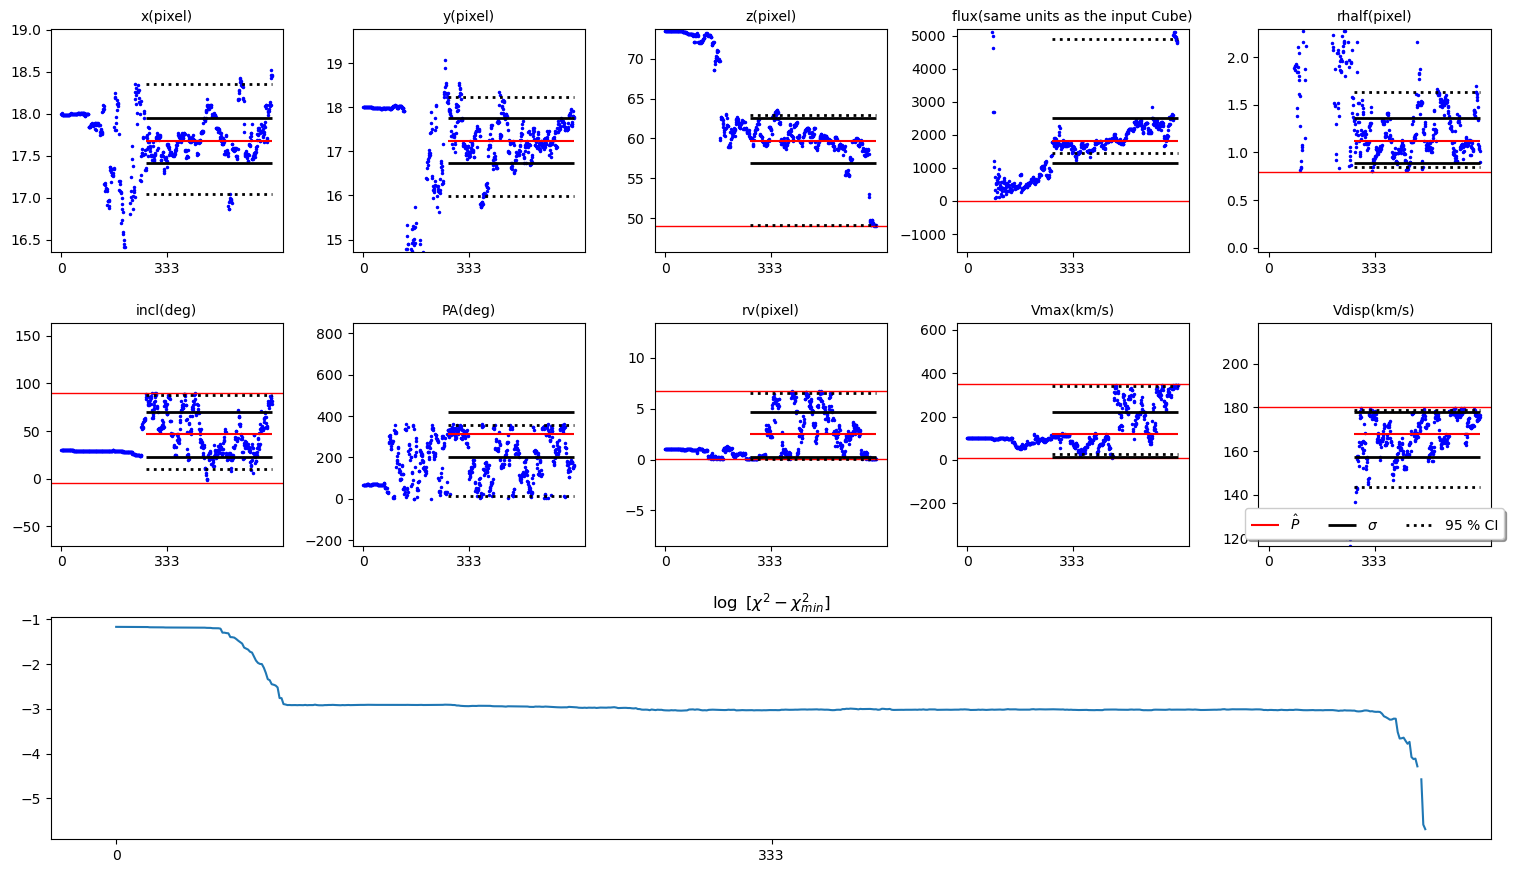

INFO:GalPaK:Parameter x has converged ? 1.00
INFO:GalPaK:Parameter z has converged ? 1.00
INFO:GalPaK:Parameter flux has converged ? 1.00
INFO:GalPaK:Parameter radius has converged ? 1.00
INFO:GalPaK:Parameter pa has converged ? 1.00


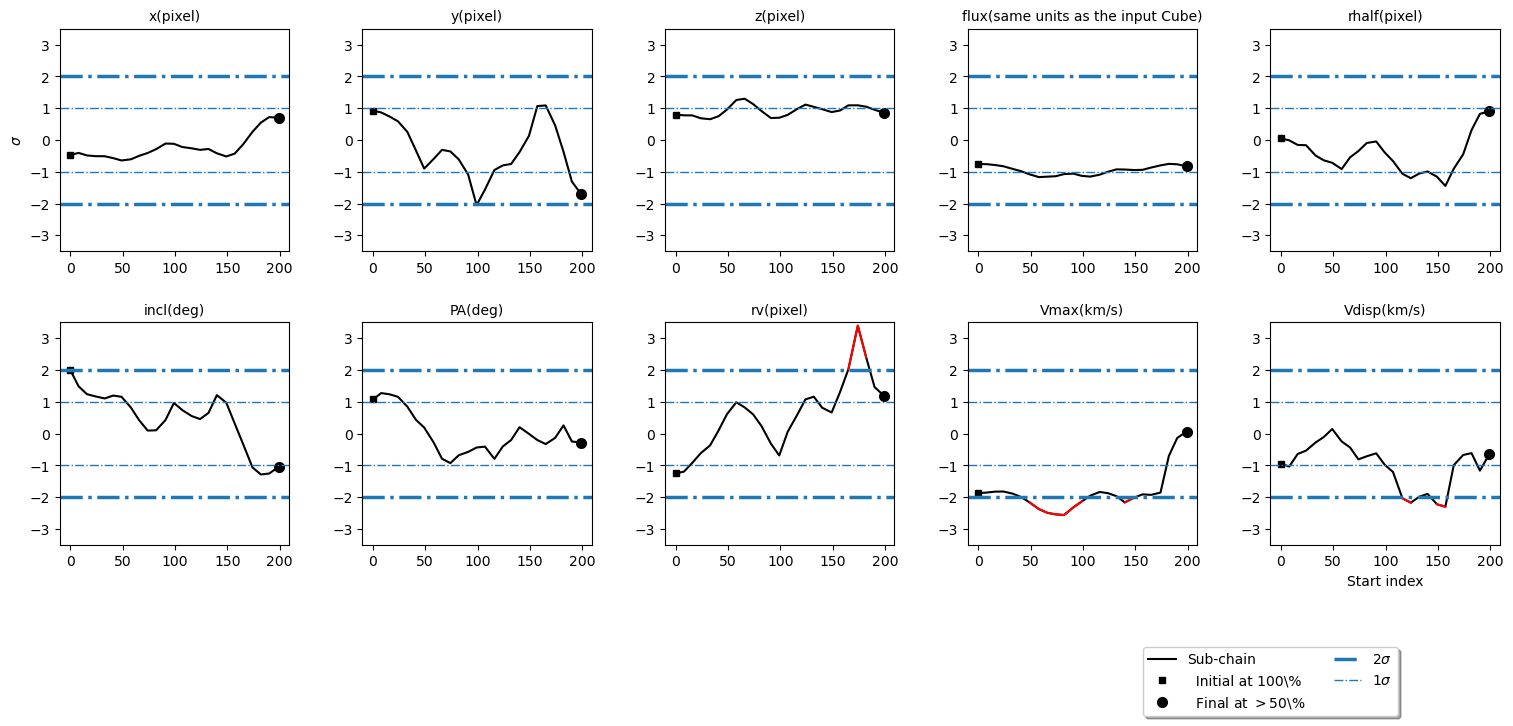

INFO:GalPaK: DiskUtilities::Adding v22 property to GalaxyParameters class
INFO:GalPaK: DiskUtilities::Adding v22 property to GalaxyParameters class
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/plot_utilities.py:447: RuntimeWarning: divide by zero encountered in divide
  ax1=self._plot2dimage(fmap / mask,
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/plot_utilities.py:447: RuntimeWarning: invalid value encountered in divide
  ax1=self._plot2dimage(fmap / mask,
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/plot_utilities.py:454: RuntimeWarning: divide by zero encountered in divide
  ax2=self._plot2dimage(vmap / mask,
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/plot_utilities.py:463: RuntimeWarning: divide by zero encountered in divide
  ax3=self._plot2dimage(smap / mask, vmin=s0, vmax=s1,
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/plot_utilities.py:610: RuntimeWarning: inva

ValueError: Axis limits cannot be NaN or Inf

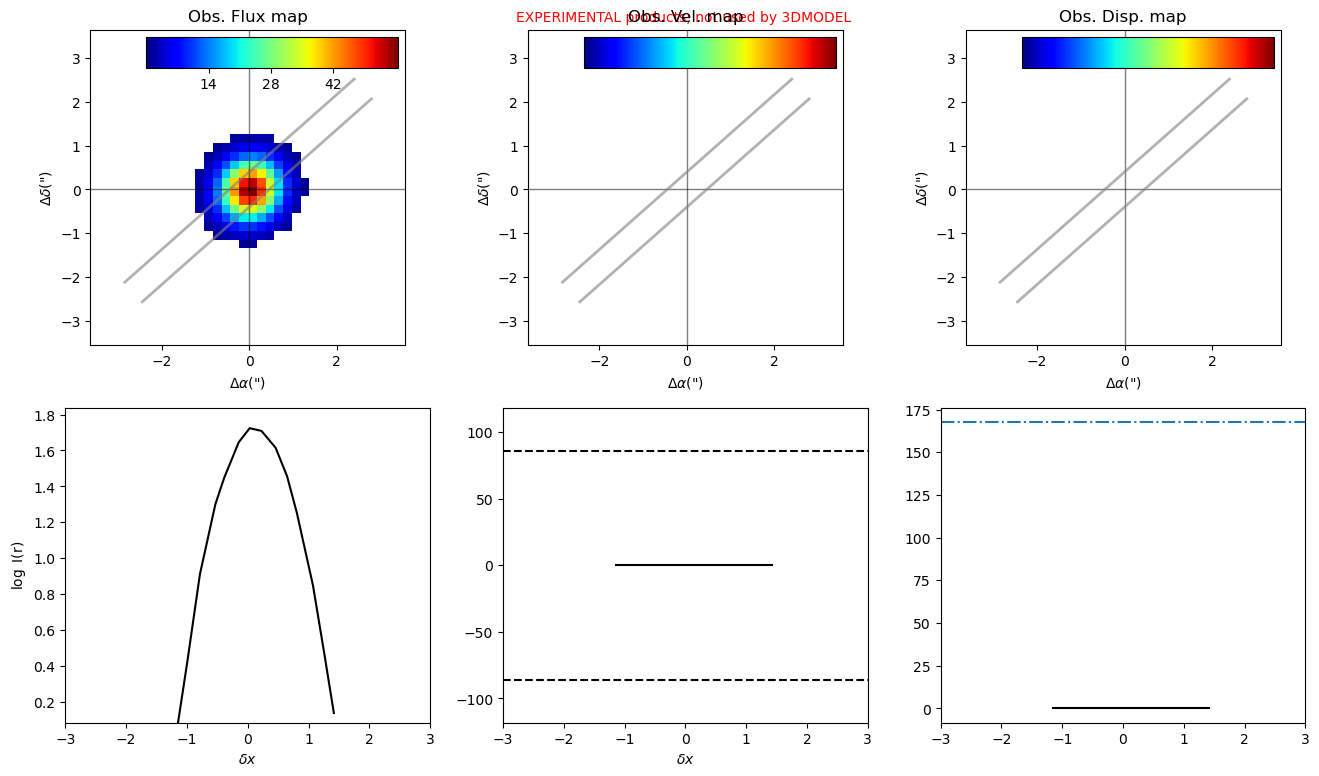

In [1]:
import galpak
from galpak import DefaultModel, ModelSersic, DiskModel
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import ascii 
from astropy.table import Table, Column
import os.path
import os
from spectral_cube import SpectralCube
from astropy import units as u
# to run Galpak to all MUSE cubes
#path to save Galpak output
path_galpak= '/media/marcelagonzalez/Toto/Galpak'

#Reading catalog
hdul = fits.open('/media/marcelagonzalez/Toto/sci/MOKA/MOKA-CANDELS-GOODS.fits')
cat= Table.read(hdul[1])
z = cat['z']
ID= cat['ID']
inst = cat['inst']

# function Galpak 
def Galpak_in(my_instrument,variance,line, my_model,file_data, path):
    if line =="O3":
        gk = galpak.run(file_data, variance, line={'wave': [4958.9, 5006.8], 'ratio': [1.0, 3.0]}, instrument=my_instrument, max_iterations=2000, model=my_model)
    elif line =="O2":
        gk = galpak.run(file_data, variance, line={'wave': [3726.2, 3728.9], 'ratio': [0.8, 1.0]}, instrument=my_instrument, max_iterations=2000, model=my_model)
    
    os.makedirs(path,  exist_ok=True)
    gk.save('{0}/{1}_galpak'.format(path, ID[m]))

#Input for Galpak using MUSE instrument 
my_instrument_MUSE = galpak.MUSE(psf_fwhm=1.0, lsf_fwhm=2.51)
#my_model = galpak.DefaultModel(rotation_curve='arctan')
my_model = galpak.DiskModel(flux_profile='gaussian', rotation_curve='isothermal')


#apply Galpak to all MOKA (MUSE) galaxies
for m in range(len(z)):
    if inst[m]=='MUSE':
        file_exists=os.path.exists('{0}/Galpak-out/MUSE-{1}'.format(path_galpak, ID[m]))
        path_single= '{0}/Galpak-out/MUSE-{1}'.format(path_galpak, ID[m])#path for galaxies with only one emission line detection
        
        if file_exists==False: 
            if cat['line'][m]=="O3":
                file_data_OIII= '{0}/cubes-input/cube_OIII-{1}.fits'.format(path_galpak, ID[m])
                variance_OIII= '{0}/cubes-input/cube_OIII-{1}-STAT.fits'.format(path_galpak, ID[m])
                Galpak_in(my_instrument= my_instrument_MUSE,variance=variance_OIII, line= "O3", my_model= my_model, file_data=file_data_OIII, path=path_single)
            
            elif cat['line'][m]=="O2":
                file_data_OII= '{0}/cubes-input/cube_OII-{1}.fits'.format(path_galpak, ID[m])
                variance_OII= '{0}/cubes-input/cube_OII-{1}-STAT.fits'.format(path_galpak, ID[m])
                Galpak_in(my_instrument= my_instrument_MUSE, variance=variance_OII, line= "O2", my_model= my_model, file_data=file_data_OII, path=path_single)
           
            elif cat['line'][m]=="three":# if you selected [OII]
                file_data_OII= '{0}/cubes-input/cube_OII-{1}.fits'.format(path_galpak, ID[m])
                variance_OII= '{0}/cubes-input/cube_OII-{1}-STAT.fits'.format(path_galpak, ID[m])
                Galpak_in(my_instrument= my_instrument_MUSE, variance=variance_OII, line="O2", my_model= my_model, file_data=file_data_OII, path=path_single)
            
            elif cat['line'][m]=="both":
                #[OII]
                file_data_OII= '{0}/cubes-input/cube_OII-{1}.fits'.format(path_galpak, ID[m])
                variance_OII= '{0}/cubes-input/cube_OII-{1}-STAT.fits'.format(path_galpak, ID[m])
                path_OII= '{0}/Galpak-out/MUSE-{1}'.format(path_galpak, ID[m])
                Galpak_in(my_instrument= my_instrument_MUSE, variance=variance_OII,line="O2", my_model= my_model, file_data=file_data_OII, path=path_OII)
                #[OIII]
                line_OIII= {'wave': [4958.9, 5006.8], 'ratio': [1.0, 3.0]}
                file_data_OIII= '{0}/cubes-input/cube_OIII-{1}.fits'.format(path_galpak, ID[m])
                variance_OIII= '{0}/cubes-input/cube_OIII-{1}-STAT.fits'.format(path_galpak, ID[m])
                path_OIII= '{0}/Galpak-out/MUSE-{1}/OIII'.format(path_galpak, ID[m])
                Galpak_in(my_instrument= my_instrument_MUSE, variance=variance_OIII, line="O3", my_model= my_model, file_data=file_data_OIII, path=path_OIII)
            
            
            

Introduce MUSE ID: 5513
Introduce line: O2


/tmp/ipykernel_7351/738710177.py:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inte= np.float(input("Iteration number:"))


Iteration number: 300


INFO:GalPaK:Reading cube from /media/marcelagonzalez/Toto/Galpak/cubes-input/cube_OII-5513.fits
INFO:GalPak: HyperCube:Opening /media/marcelagonzalez/Toto/Galpak/cubes-input/cube_OII-5513.fits.
INFO:GalPaK:Using user-provided variance input
INFO:GalPaK:Read provided variance cube   /media/marcelagonzalez/Toto/Galpak/cubes-input/cube_OII-5513-STAT.fits into HyperCube.
INFO:GalPaK:Replacing 0s in the variance cube by 1e12
INFO:GalPaK:Setting up with the following setup :
[INSTRUMENT] :
  type = MUSE
  pixscale = 0.2000000000000016 "

[PSF] :
  type = Gaussian
  fwhm         = 1.0 "
  pa           = 0.0 °
  ba           = 1.0
[LSF] :
  type = Gaussian
  fwhm = 2.51  Angstrom 

cube_xy_step   = 0.2000000000000016 "
cube_z_step    = 1.2499999999999998 Angstrom

cube z_step_kms = 42.742451407592725 km/s  at 8773.479003906297 Angstrom


INFO:GalPaK:Model set to ModelSersic : [MODEL] :
  type = ModelSersic
  flux_profile = gaussian 
  rotation_curve = isothermal 
  thickness_profile = gaussian

    1 MIN=    1 33% χ²=0.621580>0.621580 x=18.00 y=18.00 z=74.002801 flux=5.59e+04 rhalf=3.00 incl=30.0 PA=237.4 rv=1.00 Vmax= 99.98 Vdisp=5.01 lnlog=-59387.8982 
    2 MIN=    2 33% χ²=0.621094>0.621094 x=18.00 y=18.00 z=74.004492 flux=5.59e+04 rhalf=3.00 incl=30.0 PA=237.5 rv=1.00 Vmax= 99.98 Vdisp=5.06 lnlog=-59341.4710 
    3 MIN=    3 43% χ²=0.620930>0.620930 x=18.00 y=18.00 z=74.004271 flux=5.59e+04 rhalf=3.00 incl=30.0 PA=237.5 rv=1.00 Vmax= 99.94 Vdisp=5.09 lnlog=-59325.8003 
    4 MIN=    4 50% χ²=0.620473>0.620473 x=18.00 y=18.00 z=74.006409 flux=5.59e+04 rhalf=3.00 incl=30.0 PA=237.5 rv=1.00 Vmax= 99.95 Vdisp=5.10 lnlog=-59282.2020 
    5 MIN=    5 56% χ²=0.620334>0.620334 x=18.00 y=18.00 z=74.006786 flux=5.59e+04 rhalf=3.00 incl=30.0 PA=237.5 rv=1.00 Vmax= 99.98 Vdisp=5.07 lnlog=-59268.8422 
    6 MIN=    6 55% χ²=0.620131>0.620131 x=18.00 y=18.00 z=74.007716 flux=5.59e+04 rhalf=3.00 incl=30.0 PA=237.6 rv=1.00 Vmax= 99.94 Vdisp=5.05 lnlog=-59249.4762 
    7 MIN=    7 54% χ²

/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/model_class.py:476: RuntimeWarning: invalid value encountered in sqrt
  sig_map_disk = np.where(Var_map>0, np.sqrt(Var_map), 0)
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/model_class.py:469: RuntimeWarning: underflow encountered in square
  bad = (flux_map**2 == 0)
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/model_class.py:489: RuntimeWarning: invalid value encountered in divide
  sigz_map_ale = np.sqrt(bn.nansum(sig_ale_disk ** 2 * flux_cube ** 2, 0) / norm)
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/model_class.py:397: RuntimeWarning: divide by zero encountered in divide
  amplitude =  flux_map / ampsum
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/math_utils.py:112: RuntimeWarning: underflow encountered in exp
  energy = np.exp(-beta * (radius / size) ** (1. / index))
/home/marcelagonzalez/anaconda3/lib/python3.11/site-pa

  297 MIN=  297 16% χ²=0.360182>0.360182 x=18.80 y=18.04 z=98.263485 flux=2.97e+03 rhalf=1.80 incl=42.9 PA= 31.5 rv=0.07 Vmax=349.46 Vdisp=176.60 lnlog=-34413.0960 
  298 MIN=  298 16% χ²=0.360090>0.360090 x=19.16 y=17.36 z=98.397813 flux=2.98e+03 rhalf=1.71 incl=42.7 PA= 46.2 rv=0.06 Vmax=349.64 Vdisp=175.27 lnlog=-34404.2135 
  299 MIN=  299 16% χ²=0.359958>0.359958 x=19.12 y=17.35 z=98.417056 flux=3.01e+03 rhalf=1.68 incl=43.0 PA=  3.6 rv=0.08 Vmax=346.92 Vdisp=175.42 lnlog=-34391.6948 


INFO:GalPaK:Iterations report : 1882 Total, 300 OK, 15% Rate
INFO:GalPaK:Storing results as parameters...
INFO:GalPaK:self.acceptance_rate : useful iterations count / total iterations count : 15.94048884165781 
INFO:GalPaK:self.chain : full Markov chain
INFO:GalPaK:Extracting best parameters (medians) from chain
INFO:GalPaK:Setting 95 percentiles 
INFO:GalPaK:self.galaxy : fittest parameters : 
 Galaxy Parameters : value (± stdev) [units]	 [Confidence Interval]
    x: 19.75 ± 1.38 (pixel)	 CI 95%: [17.88,22.76]  
    y: 17.24 ± 0.46 (pixel)	 CI 95%: [16.65,18.07]  
    z: 77.725886 ± 6.295915 (pixel)	 CI 95%: [76.549076,98.407915]  
    flux: 3.14e+03 ± 7.14e+02 (same units as the input Cube)	 CI 95%: [2.09e+03,4.84e+03]  
    radius: 4.86 ± 1.83 (pixel)	 CI 95%: [1.84,7.60]  
    inclination: 30.0 ±  2.2 (deg)	 CI 95%: [29.3,37.4]  
    pa: 264.0 ±  73.2 (deg)	 CI 95%: [ 13.5,334.6]  
    turnover_radius: 0.12 ± 0.49 (pixel)	 CI 95%: [0.02,1.67]  
    maximum_velocity: 247.58 ± 101.30

  300 MIN=  300 16% χ²=0.359892>0.359892 x=18.78 y=17.22 z=98.382881 flux=3.26e+03 rhalf=1.73 incl=42.6 PA=343.9 rv=0.07 Vmax=347.44 Vdisp=175.40 lnlog=-34385.3629 


/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/plot_utilities.py:176: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(chain['reduced_chi'][idx] - np.min(chain['reduced_chi'])))


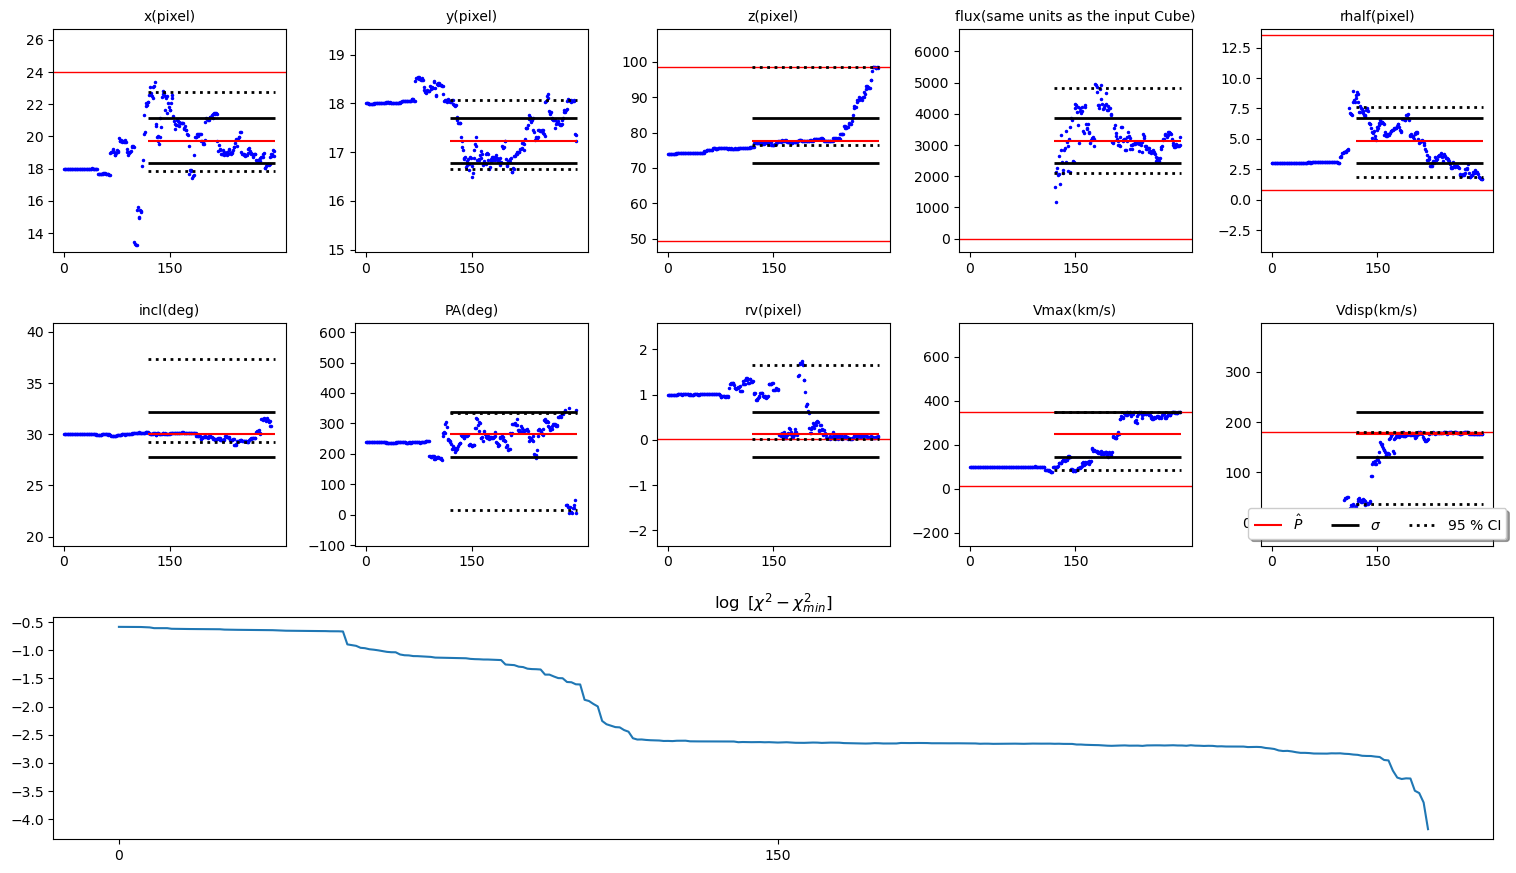

INFO:GalPaK:Parameter inclination has converged ? 1.00
INFO:GalPaK:Parameter pa has converged ? 1.00


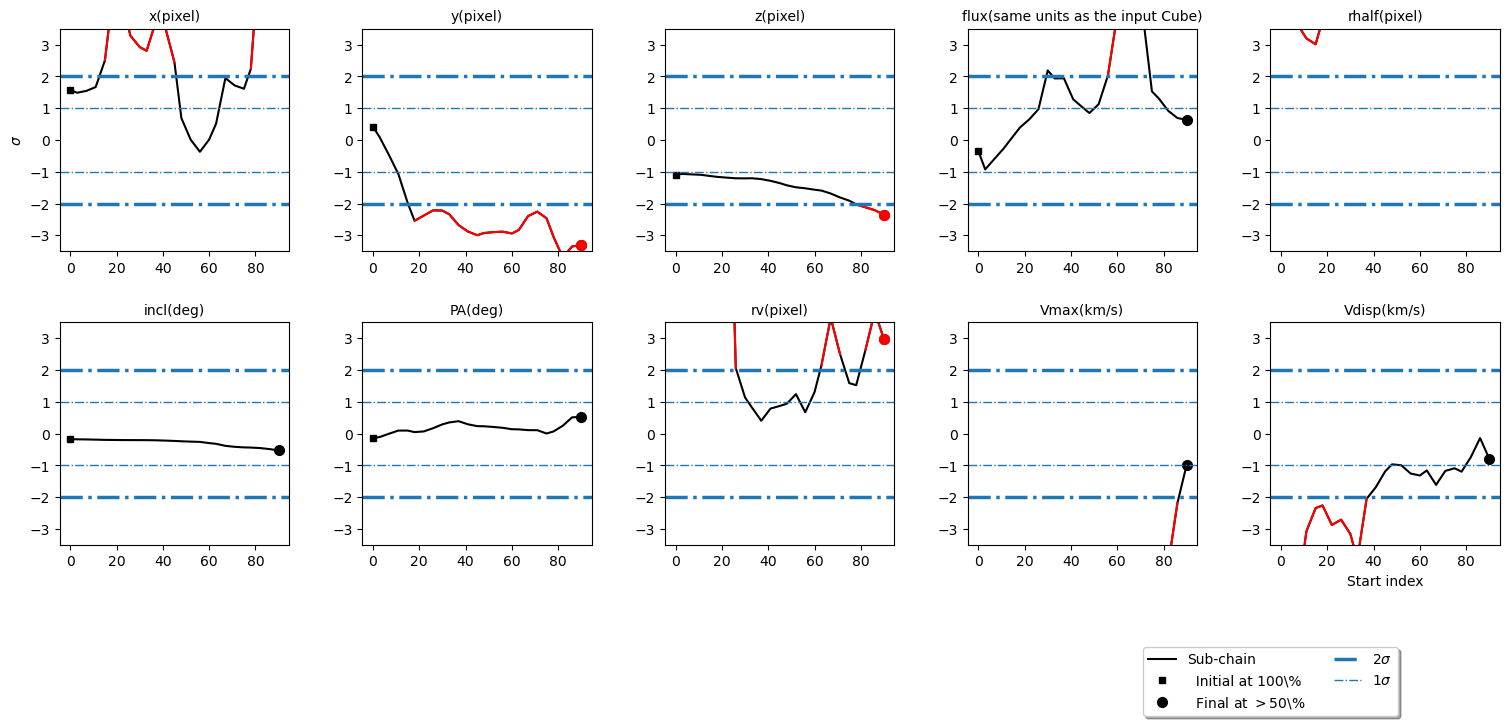

INFO:GalPaK: DiskUtilities::Adding v22 property to GalaxyParameters class
INFO:GalPaK: DiskUtilities::Adding v22 property to GalaxyParameters class
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/plot_utilities.py:447: RuntimeWarning: divide by zero encountered in divide
  ax1=self._plot2dimage(fmap / mask,
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/plot_utilities.py:454: RuntimeWarning: divide by zero encountered in divide
  ax2=self._plot2dimage(vmap / mask,
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/plot_utilities.py:463: RuntimeWarning: divide by zero encountered in divide
  ax3=self._plot2dimage(smap / mask, vmin=s0, vmax=s1,
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/plot_utilities.py:610: RuntimeWarning: invalid value encountered in divide
  ax1=self._plot2dimage(fmap / mask,
/home/marcelagonzalez/anaconda3/lib/python3.11/site-packages/galpak/plot_utilities.py:617: RuntimeWarning: inva

In [7]:

import galpak
from galpak import DefaultModel, ModelSersic
from galpak import DefaultModel, ModelSersic, DiskModel
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import ascii 
from astropy.table import Table, Column
import os.path
import os
from spectral_cube import SpectralCube
from astropy import units as u
# to run Galpak to all MUSE cubes
#path to save Galpak output
path_galpak= '/media/marcelagonzalez/Toto/Galpak'
#Reading catalog
hdul = fits.open('/media/marcelagonzalez/Toto/sci/MOKA/MOKA-CANDELS-GOODS.fits')
cat= Table.read(hdul[1])
z = cat['z']
ID= cat['ID']
inst = cat['inst']

# function Galpak 
def Galpak_in(my_instrument,my_model,file_data, path, inte):
    global gk
    if line=="O3":
        gk = galpak.run(file_data,variance='{0}/cubes-input/cube_OIII-{1}-STAT.fits'.format(path_galpak, ID), instrument=my_instrument, max_iterations=inte
                   , model=my_model)
    else: 
        gk = galpak.run(file_data,variance='{0}/cubes-input/cube_OII-{1}-STAT.fits'.format(path_galpak, ID), line={'wave': [3726.2, 3728.9], 'ratio': [0.8, 1.0]}, instrument=my_instrument, max_iterations=inte
                    , model=my_model)


    os.makedirs(path,  exist_ok=True)
    gk.save('{0}/{1}_galpak'.format(path, ID), overwrite=True)

#Input for Galpak using MUSE instrument 
my_instrument_MUSE = galpak.MUSE(psf_fwhm=1.0, lsf_fwhm=2.51)
#my_model = galpak.DefaultModel(rotation_curve='arctan')
my_model = galpak.DiskModel(flux_profile='gaussian', rotation_curve='isothermal')
#apply Galpak to a specific MOKA (MUSE) galaxy
inst= "MUSE"
ID= input("Introduce MUSE ID:" )
line= input("Introduce line:" )
inte= np.float(input("Iteration number:"))

if inst =='MUSE':
    file_exists=os.path.exists('{0}/Galpak-out/MUSE-{1}'.format(path_galpak, ID))
    path_single= '{0}/Galpak-out/MUSE-{1}'.format(path_galpak, ID)#path for galaxies with only one emission line detection
        
    if line=="O3":
        file_data_OIII= '{0}/cubes-input/cube_OIII-{1}.fits'.format(path_galpak, ID)
        Galpak_in(my_instrument= my_instrument_MUSE, my_model= my_model, file_data=file_data_OIII, path=path_single, inte=inte)
            
    else:
        file_data_OII= '{0}/cubes-input/cube_OII-{1}.fits'.format(path_galpak, ID)
        Galpak_in(my_instrument= my_instrument_MUSE, my_model= my_model, file_data=file_data_OII, path=path_single, inte=inte)
           
   # elif line =="three":# if you selected [OII]
    #    file_data_OII= '{0}/cubes-input/cube_OII-{1}.fits'.format(path_galpak, ID)
     #   Galpak_in(my_instrument= my_instrument_MUSE, my_model= my_model, file_data=file_data_OII, path=path_single, inte=inte)
          
    #elif line =="both":
        #[OII]
     #   file_data_OII= '{0}/cubes-input/cube_OII-{1}.fits'.format(path_galpak, ID)
      #  path_OII= '{0}/Galpak-out/MUSE-{1}'.format(path_galpak, ID)
       # Galpak_in(my_instrument= my_instrument_MUSE, my_model= my_model, file_data=file_data_OII, path=path_OII,inte=inte)
        #[OIII]
        #file_data_OIII= '{0}/cubes-input/cube_OIII-{1}.fits'.format(path_galpak, ID)
        #path_OIII= '{0}/Galpak-out/MUSE-{1}'.format(path_galpak, ID)
      #  Galpak_in(my_instrument= my_instrument_MUSE, my_model= my_model, file_data=file_data_OIII, path=path_OIII,inte=inte)
            
            #11
            